# The Kernel Trick

So far in this module, the discussion has talked about SVM with linear boundaries.  In the last notebook, 20.02 Linear Support Vector Machines, you put together an example where the boundary was a line with a given slope and intercept.  However, a straight line doesn’t always nicely classify the data.  

In this notebook, you'll see that you can create non-linear decision boundaries by transforming the data into a higher dimension.  Finding a good hyperplane boundary in the higher dimension and transforming the result back to the starting data.  You'll quickly cover the "kernel trick" that SVN uses to _actually_ find the boundary hyperplane in an efficient way that would otherwise be computationally prohibitive using that brute force solution.  

### Thinking Outside the Plane


In [1]:
import numpy as np 
import pandas as pd 
import scipy 
import matplotlib.pyplot as plt

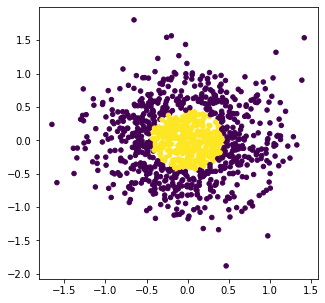

In [5]:
# Consider some data that looks like
data = pd.DataFrame()
data['x'] = np.random.normal(0, 0.5, 1000)
data['y'] = np.random.normal(0, 0.5, 1000)

# Create a circle of indicators
data['d'] = data["x"]**2 + (data["y"])**2 < 0.2

plt.figure(figsize=(5,5))
plt.scatter(data['x'], data['y'], c=data['d'], s= 20);

Clearly no straight line boundary is going to do a good job here.  What you _really_ want is a spherical boundary.  Is there any way to do that with hyperplane?  Yes.  You just need perspective.  Transoform the data from two dimensions into three dimensions by adding a new feature.  Specifically, add the new feature $x^2 + y^2$ 

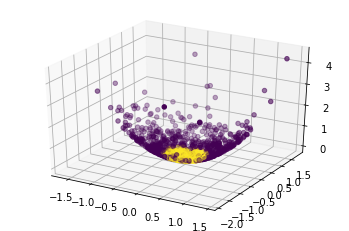

In [10]:
# Transform the plot to a 3D model 

fig = plt.figure()
ax = fig.add_subplot(111,projection="3d") 
ax.scatter(xs=data["x"], ys=data["y"], zs=data["x2_y2"], zdir="z", c=data.d);

These plots can be moved around to get a good perspective on what is happening.  A hyperplane of this new three-dimensional space is just a regular two-dimensional plane.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  """


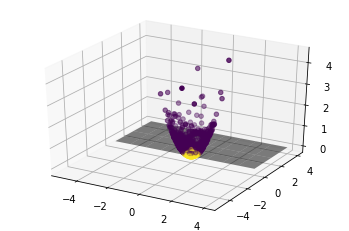

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
xx,yy = np.meshgrid(range(-5,5,1), range(-5,5,1))
zz = np.empty((10,10))
ax.plot_surface(xx,yy,zz, color="k", alpha=0.5)
ax.scatter(xs=data["x"], ys=data["y"], zs=data["x2_y2"], zdir="z", c=data["d"]);

Transforming back to two dimensions, you end up with exactly the nonlinear boundry you need.

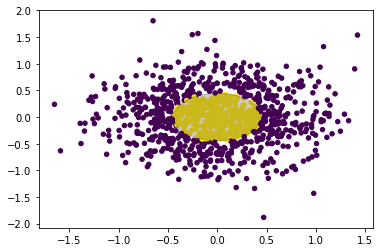

In [12]:
circle1 = plt.Circle((0,0), np.sqrt(0.2), color="k", alpha=0.2)

fig, ax = plt.subplots()

ax.scatter(data["x"], data["y"], c=data["d"], s=20)
ax.add_artist(circle1);

### Kernels and the "Kernel Trick"

Here's the bad news.  In practice you won't have the computational resources to do this.  Knowing how many dimensions you'll need is not a simple calculation, and for real data you'll probably want to run SVM with a _very_ large number of features leading to a _very high_ dimensional space.  Trying to _actually_ transform your data like this would require mor computational and memory resources then you practically have at your disposal, making this transformation impractical when working with real data.

The good news is that you can find the optimal hyperplane of a higher dimensional space _without actually transforming your data into that space_.  The process SVM uses for this is called **the kernel trick**.  The kernel trick turns the search for a higher dimensional hyperplane boundary from a practical impossibility into a computationally reasonable task.  The vector math involved in the kernel trick is too much to explain here.  This notebook will go into it just far enough for you tune the models, but a link to several external resources will be made available for further research.

#### What _is_ a Kernel?

You've herd the term "kernel" previously to refer to the central hub of your computer, linking hardware and OS.  You might be used to stopping and re-running your Python kernel in Jupyter notebooks, but this kernel is totally different.

Here, think of **kernel functions** (or just "kernels") as a way of mapping data to a space using weights.  You can see kernels all over data science once you start looking for them.

The most common example is probably [kernel smoothing](https://en.wikipedia.org/wiki/Kernel_smoother).  With kernel smoothing you take a series of observation and instead of plotting each one individually you generate a smoothed curve.  This smoothing is a byproduct of each observation becoming a weighted distribution in and of itself and then aggregating those cumulative distributions, resulting in something smooth rather than jumpy.

Kernels are a huge topic, and as a term it's used to refer to many different but related concepts.  The [wiki disambiguation page for kernels](https://en.wikipedia.org/wiki/Kernel) has links to 22 different pages on kernels that are in some way related to mathematics or computing.  It's definitely a lot, and a field worthy of its own course (or more honestly).

### Kernels in SVM

For the purposes of this notebook and course regarding SVM, a kernel is a function that computes how "similar" two vectors are by computing their dot product.  More specifically, in SVM a **kernel** is a _function that implicitly computes the dot product between two vectors in a higher-dimensional space without transforming the vectors into that space_.

This property is handy because _the dot product is all you need_ to find the optimal hyperplane in a higher dimensional space.  The complexity of these kernel functions depend only on the number of dimensions of the input, not on the number of dimensions in the higher-dimensional feature space, so you can work with an infinite-dimensional feature space just as easily as with the space of your input data.  This is called the **kernel trick**, and it lets you work with feature spaces that would otherwise be practically impossible to manage.

### Additional resources

You don't need to know more than this right now. If, however, you want a full explanation of the math behind the kernel trick read this [post by Eric Kim](http://www.eric-kim.net/eric-kim-net/posts/1/kernel_trick.html), then this [paper by Martin Hoffman](http://www.cogsys.wiai.uni-bamberg.de/teaching/ss06/hs_svm/slides/SVM_Seminarbericht_Hofmann.pdf). This [hour lecture from Patrick Winston](https://www.youtube.com/watch?v=_PwhiWxHK8o) is a good short-breathed derivation of everything you've covered in SVM so far. All those links are optional. If you don't have a good intuition of why dot products are important, check out this [video by Sal Khan](https://www.khanacademy.org/math/linear-algebra/vectors-and-spaces/dot-cross-products/v/vector-dot-product-and-vector-length) from Khan Academy's linear algebra sequence.

### Kernel Estimation if Practice

Now, there are multiple kernels you can use in SVM.  The default SKLearn is called the **radial basis function**, which uses a Gaussian decay according ot the distance from the original point.  This is the most common choice, and for this courses purposes you should stick to it unless you have a strong reason not to.  

You can also use linear kernels, polynomial kernels, or sigmoid kernels - all of which are preprogrammed into SKLearn's `SVC` function.  

When do you have a strong reason to choose another kernel? You may know enough about your data and [the geometry it follows](https://stats.stackexchange.com/a/18032) that you can choose a more appropriate kernel. The other, more common, method for deciding which kernel to use is to rely upon cross-validation. If you are within the training set, using cross validation is a reasonable way to choose a kernel methodology, but if you're tuning other hyperparameters as well this could become quite a long process. Be aware that some kernels will lead to overfitting in specific situations, so you want to be wary.
